# cluster
Unsupervised learning example: hierarchical clustering with [SciPy] and [pandas].

[SciPy]: https://docs.scipy.org/doc/scipy/reference/cluster.html
[pandas]: https://pandas.pydata.org/

In [1]:
from pandas import crosstab

from cluster import Hierarchy
from tools import irisdata, zscores

## get example data

In [2]:
# load and standardize Fisher's iris dataset
data = zscores(irisdata())
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,1.034539,-0.131539,0.816859,1.443994,virginica
146,0.551486,-1.278680,0.703564,0.919223,virginica
147,0.793012,-0.131539,0.816859,1.050416,virginica
148,0.430722,0.786174,0.930154,1.443994,virginica
149,0.068433,-0.131539,0.760211,0.788031,virginica


## build a Hierarchy
This will use all numerical columns to calculate a SciPy [linkage matrix].

[linkage matrix]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [3]:
tree = Hierarchy(data)
tree

Hierarchy with 150 leaves

In [4]:
# columns used to create the tree
tree.features

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [5]:
# copy of input data index
tree.leaves

RangeIndex(start=0, stop=150, step=1)

In [6]:
# linkage matrix (as a DataFrame)
tree.links.tail()

,left,right,distance,count
144,282,293,0.385114,56
145,287,294,0.550030,74
146,289,291,0.567752,27
147,295,296,1.043168,101
148,292,297,1.444121,150


## plot the hierarchy

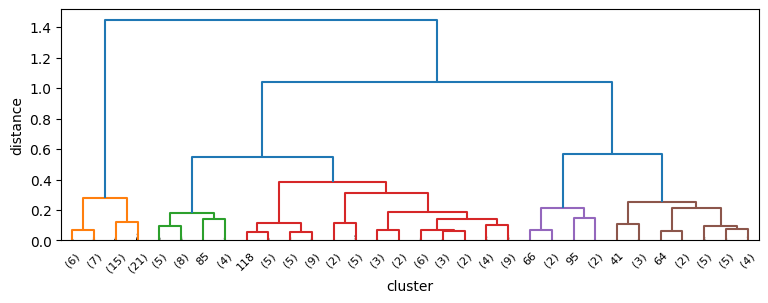

In [7]:
# show only the 32 largest clusters
axes = tree.plot(32)

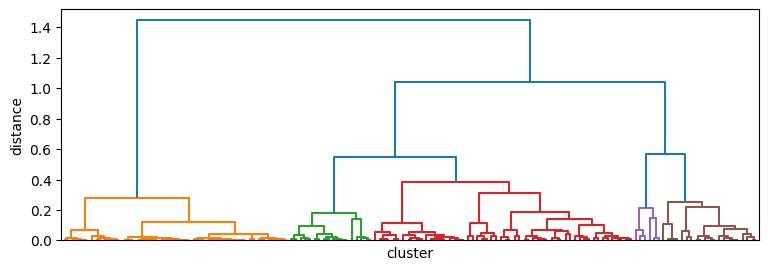

In [8]:
# show the entire tree
axes = tree.plot(no_labels=True)

## choose clusters

In [9]:
# call with a maximum number of clusters
clusters = tree(3)
clusters.tail()

145    1
146    1
147    1
148    1
149    1
Name: cluster, dtype: int32

In [10]:
# for easy joining, results have the same index as original data
clustered = data.join(clusters)
clustered.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
145,1.034539,-0.131539,0.816859,1.443994,virginica,1
146,0.551486,-1.278680,0.703564,0.919223,virginica,1
147,0.793012,-0.131539,0.816859,1.050416,virginica,1
148,0.430722,0.786174,0.930154,1.443994,virginica,1
149,0.068433,-0.131539,0.760211,0.788031,virginica,1


In [11]:
# how well do these clusters agree with the 'species' column?
clustered.groupby(["cluster", "species"], observed=False).size().unstack()

species,setosa,versicolor,virginica
cluster,,,
0,49,0,0
1,0,25,49
2,1,25,1


## choose clusters another way
See `scipy.cluster.hierarchy.fcluster` [docs] for details.

[docs]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [12]:
ward = Hierarchy(data, method="ward", metric="euclidean")
crosstab(ward(3), data['species'])

species,setosa,versicolor,virginica
cluster,,,
0,49,0,0
1,1,27,2
2,0,23,48


## help

In [13]:
help(Hierarchy)

Help on class Hierarchy in module cluster:

class Hierarchy(builtins.object)
 |  Hierarchy(data, **kwargs)
 |  
 |  SciPy hierarchical clustering with pandas inputs and outputs.
 |  Construct with a DataFrame. Non-numeric columns are ignored.
 |  Call to return a Series assigning each row to a cluster.
 |  
 |  Constructor inputs:
 |      data        DataFrame: observations to use for training
 |      **kwargs    are passed to scipy.cluster.hierarchy.linkage()
 |  
 |  Call inputs:
 |      n           int: maximum number of distinct clusters
 |      **kwargs    are passed to scipy.cluster.hierarchy.fcluster()
 |  
 |  See scipy.cluster.hierarchy docs for more information.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, n, **kwargs)
 |      Call self as a function.
 |  
 |  __init__(self, data, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __len__(self)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  plot(self, n=0, figsize=